In [1]:
import ROOT
import uproot
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.18/04


In [2]:
SUSY    = pd.read_pickle('SUSY_Mstop_175_met.pkl')
tt      = pd.read_pickle('ttbar_2016.pkl')

In [5]:
idx = np.random.permutation(len(tt))
tt  = tt[idx]

KeyError: "None of [Int64Index([303452, 332392,    417, 552981, 478645, 645733, 460021,  72292,\n            393580, 471554,\n            ...\n            596587, 646784, 436350,  41353, 139572, 395900, 275180, 317314,\n            483530, 313638],\n           dtype='int64', length=701594)] are in the [columns]"

In [3]:
tt_red  = tt[1:len(SUSY)]

print(tt_red.mean())
print(tt_red.std())

L pt             61.140010
Lbar pt          61.037397
L eta             0.005340
Lbar eta          0.012159
Abs Delta Eta     1.096174
Abs Delta Phi     1.819566
MET              75.043201
dtype: float64
L pt             36.265278
Lbar pt          36.150008
L eta             1.082816
Lbar eta          1.079635
Abs Delta Eta     0.778255
Abs Delta Phi     0.871668
MET              44.939233
dtype: float64


In [4]:
SUSY    = (SUSY   - tt_red.mean()) / SUSY.std()
#SUSY    = (SUSY   - SUSY.mean())   / SUSY.std()
tt_red  = (tt_red - tt_red.mean()) / tt_red.std()

In [5]:
tt_red

,L pt,Lbar pt,L eta,Lbar eta,Abs Delta Eta,Abs Delta Phi,MET
1,-0.201931,-0.774338,-0.470619,0.261790,-0.381782,-1.172774,-0.697843
2,-0.777619,-0.054574,-0.860978,1.731745,2.200538,-0.210999,0.369445
3,-0.622355,0.289760,0.035737,-0.346163,-0.887328,-0.214007,-1.401460
4,-0.498688,0.025156,0.120576,-0.299417,-0.834137,-1.462639,-0.536190
5,0.917471,0.405551,-1.446271,-2.009102,-0.642389,0.703461,-1.047670
...,...,...,...,...,...,...,...
31397,2.771840,-0.623980,0.179799,1.591254,0.557567,0.646139,0.074149
31398,-1.063785,-0.926014,0.143025,1.559751,0.565030,-1.041757,0.192137
31399,1.447011,0.507131,1.316913,0.251362,0.066306,0.523333,1.205416
31400,1.688331,-1.011924,-0.488638,-0.998668,-0.711723,-0.373356,-1.255760


/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


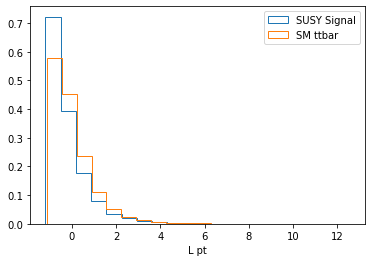

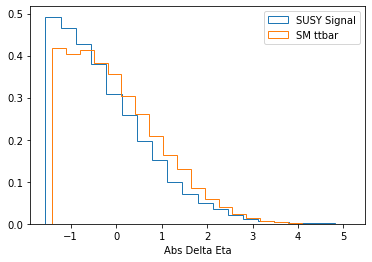

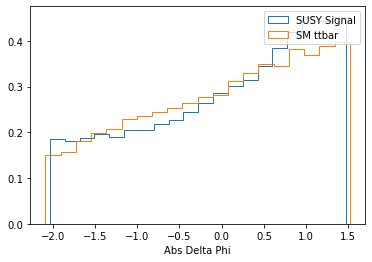

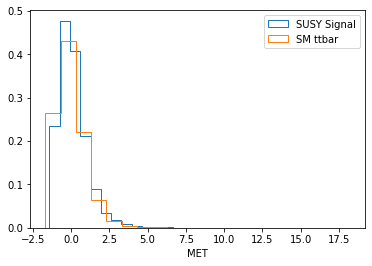

In [6]:
HLFs = ['L pt', 'Abs Delta Eta', 'Abs Delta Phi', 'MET']
for hlf in HLFs:
    plt.figure()
    plt.hist(SUSY[hlf]  , bins=20, normed=True, histtype='step', label='SUSY Signal')
    plt.hist(tt_red[hlf], bins=20, normed=True, histtype='step', label='SM ttbar')
    plt.xlabel(hlf)
    plt.legend(loc='best')

In [7]:
#tt = tt[1:len(SUSY)]

In [8]:
#SUSY    = SUSY  - tt.mean() / SUSY.std()

#tt      = tt    - tt.mean() / tt.std()
#tt_bg   = tt_bg - tt.mean() / tt_bg.std()
#tt_st   = tt_st - tt.mean() / tt_st.std()

In [9]:
SUSY_val   = SUSY.values
tt_val     = tt_red.values

SUSY_label = np.ones(len(SUSY))
tt_label   = np.zeros(len(tt_red))

data       = np.concatenate((SUSY_val  ,tt_val))
label      = np.concatenate((SUSY_label,tt_label))

In [10]:
data.shape

(62803, 7)

In [11]:
len(label[label == 0])

31401

In [12]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2, shuffle=True)
skf.get_n_splits(data, label)
skf.split(data, label)

<generator object _BaseKFold.split at 0x1a3469ff48>

In [13]:
for train_index, test_index in skf.split(data, label):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = data[train_index], data[test_index]
    y_train, y_test = label[train_index], label[test_index]

TRAIN: [    0     2     6 ... 62797 62799 62800] TEST: [    1     3     4 ... 62798 62801 62802]
TRAIN: [    1     3     4 ... 62798 62801 62802] TEST: [    0     2     6 ... 62797 62799 62800]


In [14]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [25]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from skopt import gp_minimize

model = Sequential()
opt   = SGD(lr=0.9, decay=1e-6, momentum=0.05, nesterov=True)

model.add(Dense(14, input_dim = 7 ,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(1, activation='sigmoid'))

#model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 14)                112       
_________________________________________________________________
dropout_4 (Dropout)          (None, 14)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 15        
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [23]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [34]:
hist = model.fit(x_train, y_train, batch_size=75, nb_epoch=100, verbose=1, shuffle=True, validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
                  ModelCheckpoint(filepath='model.h5', verbose=0)])

Train on 25121 samples, validate on 6281 samples
Epoch 1/100
 7725/25121 [========>.....................] - ETA: 0s - loss: 0.3236 - acc: 0.8225

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


25121/25121 [==============================] - 0s 16us/step - loss: 0.3297 - acc: 0.8215 - val_loss: 0.2796 - val_acc: 0.8390
Epoch 2/100
25121/25121 [==============================] - 0s 16us/step - loss: 0.3362 - acc: 0.8182 - val_loss: 0.2866 - val_acc: 0.8376
Epoch 3/100
25121/25121 [==============================] - 0s 16us/step - loss: 0.3366 - acc: 0.8174 - val_loss: 0.2871 - val_acc: 0.8379
Epoch 4/100
25121/25121 [==============================] - 0s 14us/step - loss: 0.3377 - acc: 0.8166 - val_loss: 0.2732 - val_acc: 0.8488
Epoch 5/100
25121/25121 [==============================] - 0s 14us/step - loss: 0.3302 - acc: 0.8210 - val_loss: 0.2858 - val_acc: 0.8319
Epoch 6/100
25121/25121 [==============================] - 0s 14us/step - loss: 0.3390 - acc: 0.8168 - val_loss: 0.3142 - val_acc: 0.8097
Epoch 7/100
25121/25121 [==============================] - 0s 14us/step - loss: 0.3312 - acc: 0.8210 - val_loss: 0.2827 - val_acc: 0.8427
Epoch 8/100
25121/25121 [=====================

25121/25121 [==============================] - 0s 18us/step - loss: 0.2774 - acc: 0.8780 - val_loss: 0.2585 - val_acc: 0.8909
Epoch 61/100
25121/25121 [==============================] - 0s 15us/step - loss: 0.2862 - acc: 0.8737 - val_loss: 0.1917 - val_acc: 0.9226
Epoch 62/100
25121/25121 [==============================] - 0s 14us/step - loss: 0.2862 - acc: 0.8754 - val_loss: 0.2223 - val_acc: 0.9140
Epoch 63/100
25121/25121 [==============================] - 0s 17us/step - loss: 0.2719 - acc: 0.8828 - val_loss: 0.1798 - val_acc: 0.9274
Epoch 64/100
25121/25121 [==============================] - 0s 16us/step - loss: 0.2737 - acc: 0.8835 - val_loss: 0.1982 - val_acc: 0.9207
Epoch 65/100
25121/25121 [==============================] - 0s 15us/step - loss: 0.2772 - acc: 0.8801 - val_loss: 0.1792 - val_acc: 0.9317
Epoch 66/100
25121/25121 [==============================] - 0s 15us/step - loss: 0.2775 - acc: 0.8796 - val_loss: 0.2114 - val_acc: 0.9153
Epoch 00066: early stopping


In [27]:
def show_losses( histories ):
    plt.figure(figsize=(10,10))
    #plt.ylim(bottom=0)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Error by Epoch')
    colors=[]
    do_acc=False
    for label,loss in histories:
        color = tuple(np.random.random(3))
        colors.append(color)
        l = label
        vl= label+" validation"
        if 'acc' in loss.history:
            l+=' (acc %2.4f)'% (loss.history['acc'][-1])
            do_acc = True
        if 'val_acc' in loss.history:
            vl+=' (val acc %2.4f)'% (loss.history['val_acc'][-1])
            do_acc = True
        plt.plot(loss.history['loss'], label=l, color=color)
        if 'val_loss' in loss.history:
            plt.plot(loss.history['val_loss'], lw=2, ls='dashed', label=vl, color=color)


    plt.legend()
    plt.yscale('log')
    plt.show()
    if not do_acc: return
    plt.figure(figsize=(10,10))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    for i,(label,loss) in enumerate(histories):
        color = colors[i]
        if 'acc' in loss.history:
            plt.plot(loss.history['acc'], lw=2, label=label+" accuracy", color=color)
        if 'val_acc' in loss.history:
            plt.plot(loss.history['val_acc'], lw=2, ls='dashed', label=label+" validation accuracy", color=color)
    plt.legend(loc='lower right')

    plt.show()

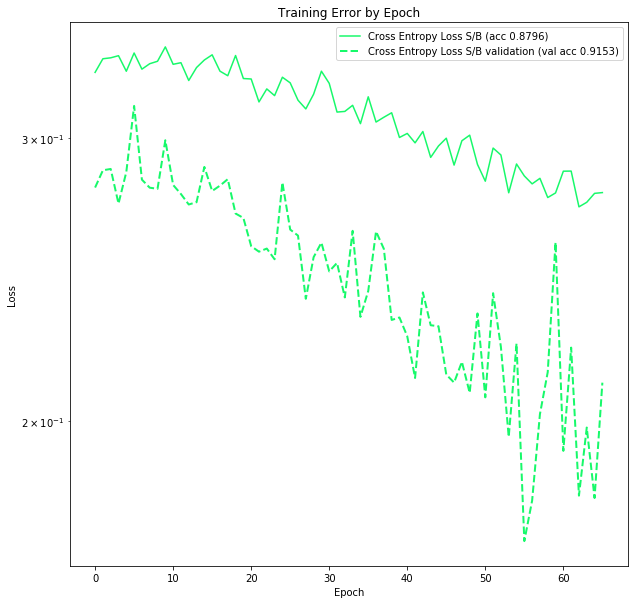

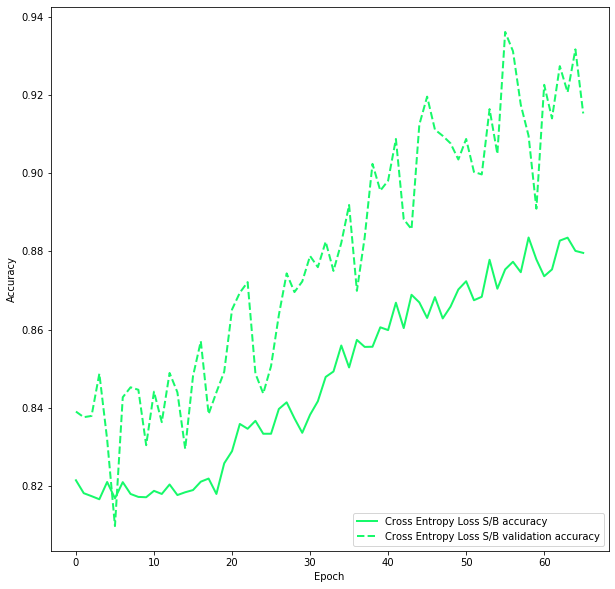

In [35]:
show_losses( [("Cross Entropy Loss S/B", hist)])

In [29]:
from sklearn.metrics import roc_curve
y_pred = model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)

In [30]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

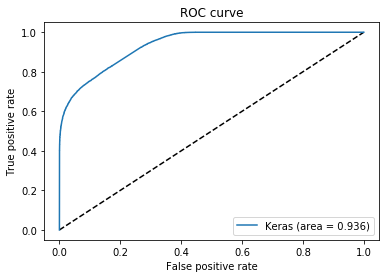

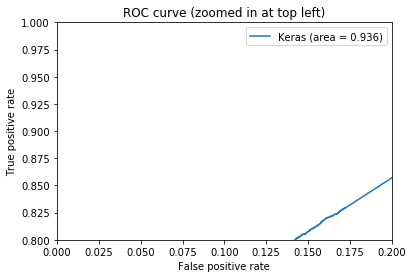

In [36]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


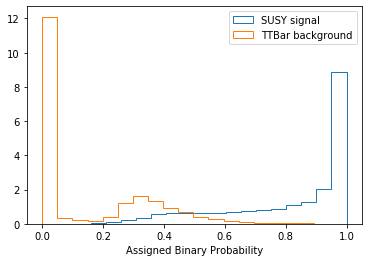

In [37]:
pred = model.predict(x_test) 
plt.figure()
plt.hist(pred[y_test == 1], bins=20, normed=True, histtype='step', label='SUSY signal')
plt.hist(pred[y_test == 0], bins=20, normed=True, histtype='step', label='TTBar background')
plt.xlabel('Assigned Binary Probability')
plt.legend(loc='best')

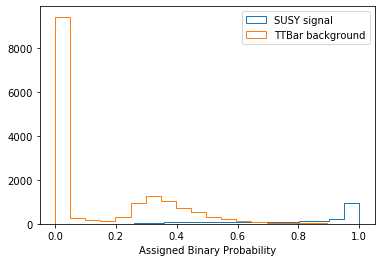

In [38]:
(counts, bins) = np.histogram(pred[y_test == 1], bins=20)
plt.figure()
SUSY_cts, SUSY_bins,_  = plt.hist(bins[:-1], bins, weights = 0.14 * counts, histtype='step', label='SUSY signal')
SM_cts, SM_bins,_      = plt.hist(pred[y_test == 0], bins=20, histtype='step', label='TTBar background')
plt.xlabel('Assigned Binary Probability')
plt.legend(loc='best')

(array([  72.,  274.,  610., 1181., 4163., 4648., 4655., 4818., 5143.,
        5838.]),
 array([0.10281938, 0.1925256 , 0.2822318 , 0.37193802, 0.46164423,
        0.5513505 , 0.64105666, 0.73076284, 0.8204691 , 0.9101753 ,
        0.9998815 ], dtype=float32),
 <a list of 10 Patch objects>)

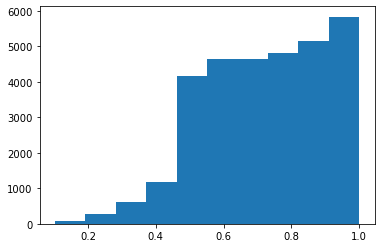

In [25]:
plt.hist(model.predict(SUSY))

(array([2.44943e+05, 2.78690e+04, 1.50790e+04, 8.29900e+03, 5.43900e+03,
        4.02000e+03, 3.29300e+03, 2.70700e+03, 2.37000e+03, 2.01300e+03,
        1.71200e+03, 1.46600e+03, 1.38500e+03, 1.12700e+03, 9.35000e+02,
        8.50000e+02, 6.49000e+02, 4.70000e+02, 3.33000e+02, 6.20000e+01]),
 array([0.        , 0.04689693, 0.09379385, 0.14069077, 0.18758771,
        0.23448463, 0.28138155, 0.32827848, 0.37517542, 0.42207232,
        0.46896926, 0.51586616, 0.5627631 , 0.60966   , 0.65655696,
        0.7034539 , 0.75035083, 0.7972477 , 0.84414464, 0.8910416 ,
        0.9379385 ], dtype=float32),
 <a list of 1 Patch objects>)

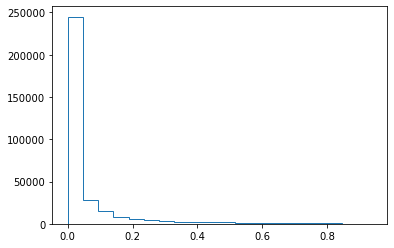

In [28]:
#tt = (tt - tt.mean()) / tt.std()
plt.hist(model.predict(tt), histtype='step', bins=20)

In [43]:
tt      = pd.read_pickle('ttbar_2016.pkl')
tt_bg   = pd.read_pickle('tt_other_met.pkl')
tt_st   = pd.read_pickle('Single_top_met.pkl')

tt     = (tt - tt.mean()) / tt.std()
tt_bg  = (tt_bg - tt.mean())/ tt_bg.std()
tt_st  = (tt_st - tt.mean())/ tt_st.std()

(array([6.0000e+00, 1.1900e+02, 4.1170e+03, 6.8540e+03, 5.7490e+03,
        5.1270e+03, 4.7110e+03, 5.0050e+03, 5.5610e+03, 6.5700e+03,
        8.3810e+03, 4.8355e+04, 6.7360e+03, 4.2770e+03, 2.2840e+03,
        1.0520e+03, 3.8900e+02, 1.3700e+02, 3.4000e+01, 8.0000e+00]),
 array([0.00331804, 0.02796202, 0.05260599, 0.07724997, 0.10189395,
        0.12653792, 0.15118189, 0.17582586, 0.20046985, 0.22511382,
        0.2497578 , 0.27440178, 0.29904574, 0.32368973, 0.3483337 ,
        0.37297767, 0.39762166, 0.42226562, 0.4469096 , 0.47155356,
        0.49619755], dtype=float32),
 <a list of 1 Patch objects>)

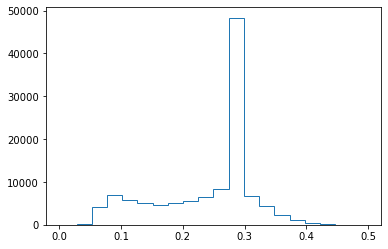

In [26]:
plt.hist(model.predict(tt_bg), histtype='step', bins=20)

(array([1.000e+00, 6.600e+01, 2.410e+02, 2.550e+02, 1.850e+02, 1.830e+02,
        1.720e+02, 1.560e+02, 2.130e+02, 2.240e+02, 2.670e+02, 1.944e+03,
        2.530e+02, 1.810e+02, 1.320e+02, 7.100e+01, 4.000e+01, 2.700e+01,
        7.000e+00, 5.000e+00]),
 array([0.02553424, 0.04718187, 0.06882949, 0.09047711, 0.11212473,
        0.13377236, 0.15541998, 0.17706761, 0.19871522, 0.22036286,
        0.24201047, 0.2636581 , 0.2853057 , 0.30695334, 0.32860097,
        0.35024858, 0.3718962 , 0.39354384, 0.41519147, 0.43683907,
        0.4584867 ], dtype=float32),
 <a list of 1 Patch objects>)

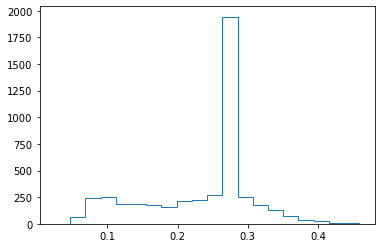

In [27]:
plt.hist(model.predict(tt_st), histtype='step', bins=20)

In [21]:
data = pd.read_pickle('data.pkl')

(array([   24.,    45.,   147.,   420.,   992.,  2283.,  4343.,  7229.,
        10427., 13576., 16367., 17639., 16869., 15397., 12292.,  8638.,
         6746.,  1823.,   410.,    30.]),
 array([0.00745437, 0.04234406, 0.07723375, 0.11212344, 0.14701314,
        0.18190283, 0.21679252, 0.25168222, 0.28657192, 0.32146162,
        0.35635132, 0.39124098, 0.42613068, 0.46102038, 0.49591008,
        0.53079975, 0.56568944, 0.60057914, 0.63546884, 0.67035854,
        0.70524824], dtype=float32),
 <a list of 1 Patch objects>)

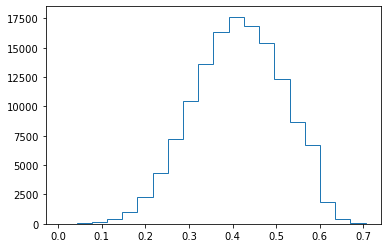

In [22]:
plt.hist(model.predict(data), histtype='step', bins=20)

In [39]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model_2016_pkl.json", "w") as json_file:
    json_file.write(model_json)

    # serialize weights to HDF5
model.save_weights("model_2016_pkl.h5")
print("Saved model to disk")

Saved model to disk


In [40]:
fig_style = {
    'figsize': (5, 5),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}

stack_style = {
    'edgecolor': (0, 0, 0, 0.5),
}

hatch_style = {
    'facecolor': 'none',
    'edgecolor': (0, 0, 0, 0.5),
    'linewidth': 0,
    'hatch': '/////',
}

errorbar_style = {
    'linestyle': 'none',
    'marker': '.',
    'elinewidth': 1,
    'capsize': 1,
    'color': 'k',
}

shaded_style = {
    'facecolor': (0,0,0,0.3),
    'linewidth': 0
}

In [27]:
Lumi = 35922
Xsec = 831.76

nmc  = 2423297
nnt  = Lumi * Xsec

print(nmc, nnt)
print('MC weight :: %f ' %(nnt/ nmc))

2423297 29878482.72
MC weight :: 12.329683 


In [41]:
tt_w    = 0.192627
#tt_w    = 12.329683 
tt_bg_w = 0.096267 
tt_st_w = 1.294080
SUSY_w  = 0.793210

In [38]:
#SUSY    = pd.read_pickle('SUSY_Mstop_175.pkl')
#tt      = pd.read_pickle('ttbar.pkl')

#tt_bg   = pd.read_pickle('ttbg.pkl')
#tt_st   = pd.read_pickle('single_top.pkl')
data     = pd.read_pickle('data.pkl')

In [39]:
tt_means = [61.140010, 61.037397 ,0.005340, 0.012159, 1.096174 ,1.819566]
tt_std   = [36.265278, 36.150008, 1.082816 ,1.079635 ,0.778255, 0.871668]

In [44]:
#tt       = (tt - tt_means)/ tt.std()

#tt_bg   = (tt_bg - tt_means)/ tt_bg.std()
#tt_st   = (tt_st - tt_means)/ tt_st.std()

data    = (data - tt.mean())/ data.std()

ValueError: Length of passed values is 62803, index implies 7

In [26]:
#SUSY    = SUSY   - tt_red.mean()/ SUSY.std()
#tt       = tt - tt_red.mean()/ tt_red.std()

#tt_bg   = (tt_bg - tt_red.mean())/ tt_bg.std()
#tt_st   = (tt_st - tt_red.mean())/ tt_st.std()

#data    = (data - tt_red.mean())/ data.std()

In [42]:
SUSY_pred  =  model.predict(SUSY)

tt_pred    =  model.predict(tt)
tt_bg_pred =  model.predict(tt_bg)
tt_st_pred =  model.predict(tt_st)

data_pred  =  model.predict(data)

In [47]:
bin_edges = np.linspace(0, 1, 20)

pdf_SUSY  = np.histogram(SUSY_pred, bins=bin_edges)[0]  * SUSY_w    * 0.94
pdf_tt    = np.histogram(tt_pred, bins=bin_edges)[0]    * tt_w      * 0.94
pdf_st    = np.histogram(tt_st_pred, bins=bin_edges)[0] * tt_st_w   * 0.94
pdf_tt_bg = np.histogram(tt_bg_pred, bins=bin_edges)[0] * tt_bg_w   * 0.94

# Usually sumw2 would be part of the histogram filling package

sumw2_SUSY  = pdf_SUSY  * SUSY_w
sumw2_tt    = pdf_tt    * tt_w
sumw2_tt_bg = pdf_tt_bg * tt_bg_w
sumw2_st    = pdf_st    * tt_st_w

sum_bkg     = pdf_tt_bg   + pdf_st + pdf_tt
sumw2_bkg   = sumw2_tt_bg + sumw2_st + sumw2_tt

sumw2_sig   = sumw2_SUSY

#observed_pdf = np.random.poisson(sum_bkg + pdf_SUSY )
observed_pdf = np.histogram(data_pred , bins=bin_edges)[0]
bin_centers  = (bin_edges[:-1] + bin_edges[1:])/2

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-48-92e4a135d3e7>", line 44, in <module>
    plt.savefig('DNN Discriminant')
  File "/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py", line 722, in savefig
  File "/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py", line 2180, in savefig
  File "/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 2082, in print_figure
  File "/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py", line 530, in print_png
  File "/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/contextlib.py", line 112, in __enter__
  File "/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/matplotlib/c

OSError: [Errno 24] Too many open files: 'DNN Discriminant.png'

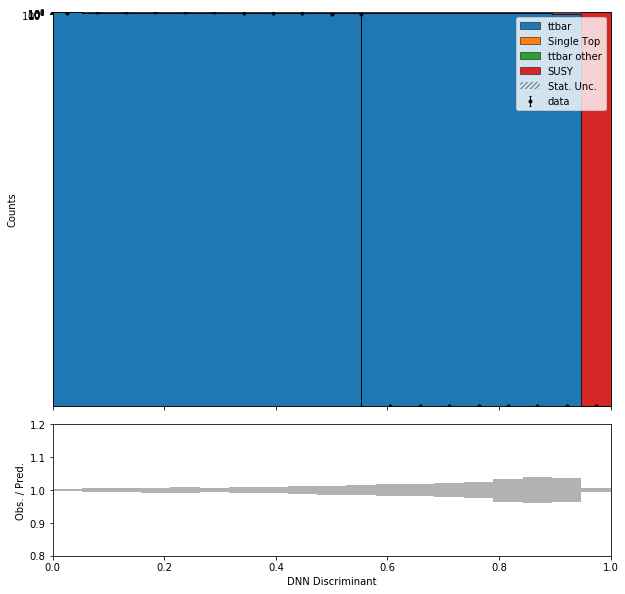

In [48]:
fig, (ax, rax) = plt.subplots(2, 1, sharex=True, **ratio_fig_style)
fig.subplots_adjust(hspace=.07)  # this controls the margin between the two axes

# Stack up the various contributions
labels = ['ttbar','Single Top', 'ttbar other', 'SUSY']
sumw_stack = np.vstack([pdf_tt, pdf_st, pdf_tt_bg, pdf_SUSY])

# depending on step option ('pre' or 'post'), the last bin
# needs be concatenated on one side, so that the edge bin is drawn

sumw_stack = np.hstack([sumw_stack, sumw_stack[:,-1:]])
ax.stackplot(bin_edges, sumw_stack, labels=labels, step='post', **stack_style)

# Overlay an uncertainty hatch
sumw_total = sumw_stack.sum(axis=0)
unc = np.sqrt(sumw2_sig + sumw2_bkg)
unc = np.hstack([unc, unc[-1]])
ax.fill_between(x=bin_edges, y1=sumw_total - unc, y2=sumw_total + unc,
                label='Stat. Unc.', step='post', **hatch_style
               )

# Draw the observation
ax.errorbar(x=bin_centers, y=observed_pdf, yerr=np.sqrt(observed_pdf),
            label='data', **errorbar_style
            )

ax.set_ylim(0, None)
ax.set_ylabel('Counts')
ax.set_yscale('log')
ax.legend()

# Draw some sort of ratio, keeping the two uncertainty sources
# separate rather than combining (as per tradition)
rax.fill_between(x=bin_edges, y1=1 - unc/sumw_total, y2=1 + unc/sumw_total, step='post', **shaded_style)
sumw_total = sumw_total[:-1]  # Take away that copy of the last bin
rax.errorbar(x=bin_centers, y=observed_pdf/sumw_total, yerr=np.sqrt(observed_pdf)/sumw_total, **errorbar_style)

rax.set_ylim(0.8, 1.2)
rax.set_ylabel('Obs. / Pred.')
# setting the x label on the stack pad clashes with the ratio axes frame
rax.set_xlabel('DNN Discriminant')
# we have to autoscale in the ratio axis after drawing all items
rax.autoscale(axis='x', tight=True)
plt.savefig('DNN Discriminant')

(array([9954., 6983., 4608., 4796., 2764., 1620., 1042.,  673.,  509.,
         421.]),
 array([0.00772005, 0.10694805, 0.20617604, 0.30540404, 0.40463203,
        0.50386   , 0.603088  , 0.70231605, 0.801544  , 0.900772  ,
        1.        ], dtype=float32),
 <a list of 10 Patch objects>)

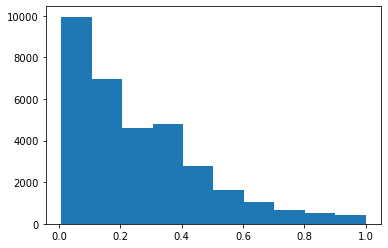

In [42]:
plt.hist(tt_pred)

Text(0, 0.5, 'Counts')

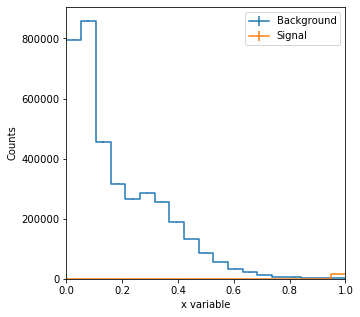

In [36]:
fig, ax = plt.subplots(**fig_style)

bin_centers = (bin_edges[:-1] + bin_edges[1:])/2

# To draw both the vertical error bar as well as a stairstep through
# the bin content we have to make two separate draw calls.  
line1, = ax.step(x=bin_edges,
                 # Depending on the 'where' option ('pre' or 'post'), the last bin 
                 # needs be concatenated on one side, so that the edge bin is drawn
                 y=np.hstack([sum_bkg, sum_bkg[-1]]),
                 where='post'
                )
err1 = ax.errorbar(x=bin_centers,
                   y=sum_bkg,
                   yerr=np.sqrt(sumw2_bkg),
                   # By default, a line connecting the errorbars is drawn, turn it off
                   linestyle='none',
                   # Grab the last used color, so that the objects share the same color
                   color=line1.get_color()
                  )

line2, = ax.step(x=bin_edges, y=np.hstack([pdf_SUSY, pdf_SUSY[-1]]), where='post')
err2 = ax.errorbar(x=bin_centers, y=pdf_SUSY, yerr=np.sqrt(sumw2_SUSY),
            linestyle='none', color=line2.get_color()
           )

# matplotlib defaults to having a margin around the visible plots, this removes it
ax.autoscale(axis='x', tight=True)
ax.set_ylim(0, None)

# A tuple can be passed to plt.legend to group two items together
# (and hence overlay their legend marker styles)
ax.legend([(line1, err1), (line2, err2)], ['Background', 'Signal'])

ax.set_xlabel('x variable')
ax.set_ylabel('Counts')